# Normalizer (2025 Aug)

Date: 21 August 2025<br>
By: Eunhye Yang<br>
Description:<br>
1. Log transformation based on skewness of the features (skew > 0.5 | skew < -0.5)
2. Normalizing dataset using min max scaler

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df = pd.read_csv('./imputed_nosurgery_QMH_2025Nov.csv')
continuous = ['Age', 'AdmissionsystolicBP', 'AdmissiondiastolicBP', 'LARGESTICHVOLUME']

## Plot continuous features before transformation

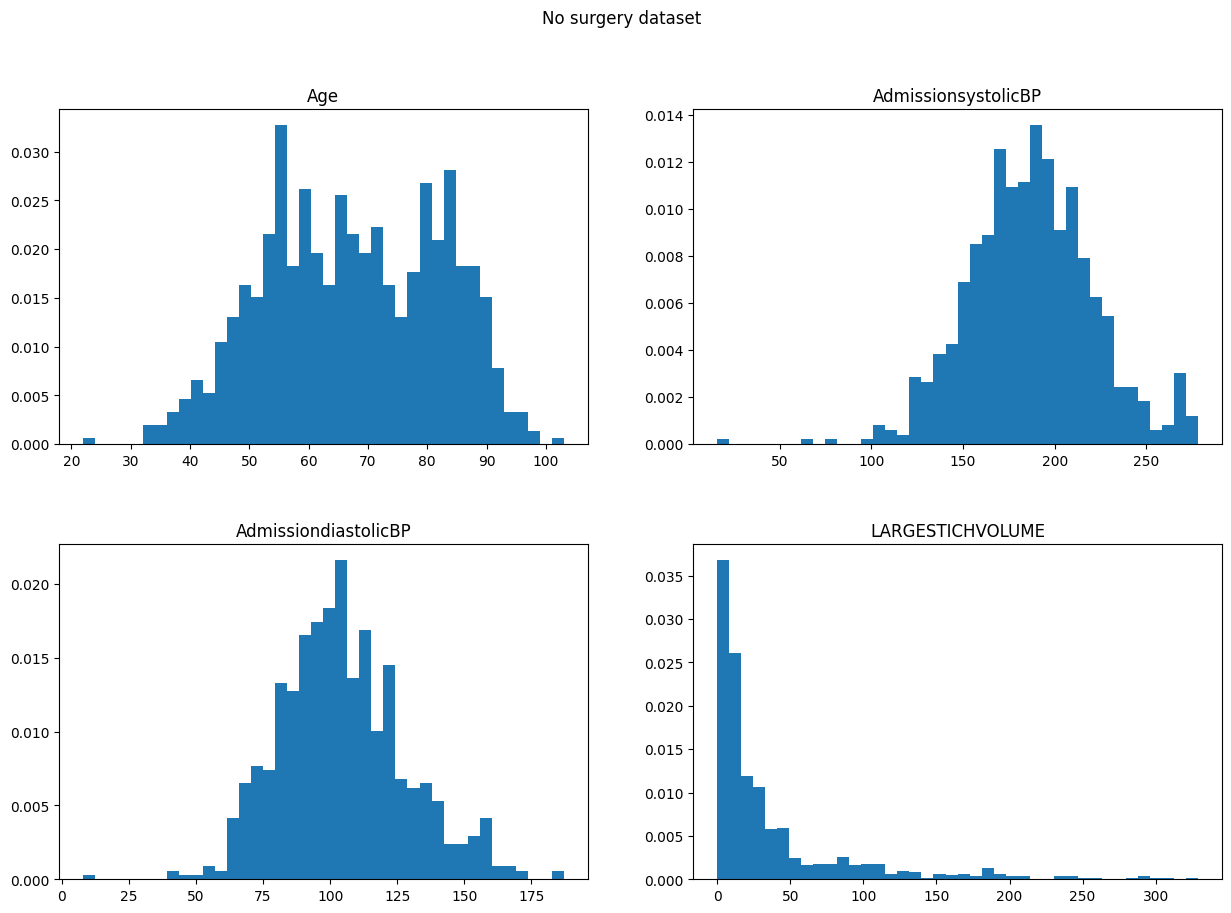

In [2]:
rows = 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

for i, ax in enumerate(axes.flatten()):
    ax.hist(df[continuous[i]], bins=40, density=True)
    # ax.set_xlim(-0.1, 1.1)
    ax.set_title(continuous[i])

plt.suptitle('No surgery dataset')
plt.subplots_adjust(hspace=0.3)
plt.savefig('beforenorm.png')
plt.show()

## Check skewness

In [3]:
df[continuous].skew(axis=0)

Age                    -0.092967
AdmissionsystolicBP    -0.030380
AdmissiondiastolicBP    0.354167
LARGESTICHVOLUME        2.582959
dtype: float64

LARGESTICHVOLUME very skewed, need log transformation

## Add dummy min and max

In [4]:
dummy_min = pd.Series(0, index=continuous)
dummy_min['Age'] = 17
df = pd.concat([df, dummy_min.to_frame().T], ignore_index=True)

dummy_max = pd.Series(0, index=continuous)
dummy_max['Age'] = 121
dummy_max['AdmissionsystolicBP'] = 351
dummy_max['AdmissiondiastolicBP'] = 251
dummy_max['LARGESTICHVOLUME'] = 451
df = pd.concat([df, dummy_max.to_frame().T], ignore_index=True)

## Log transformation

In [5]:
df['LARGESTICHVOLUME'] = np.log(df['LARGESTICHVOLUME']+1)

## Min Max scaling

In [6]:
min_max = MinMaxScaler()
df[continuous] = min_max.fit_transform(df[continuous])

## Remove dummy rows

In [7]:
df = df.iloc[:-2]

## Normalization result

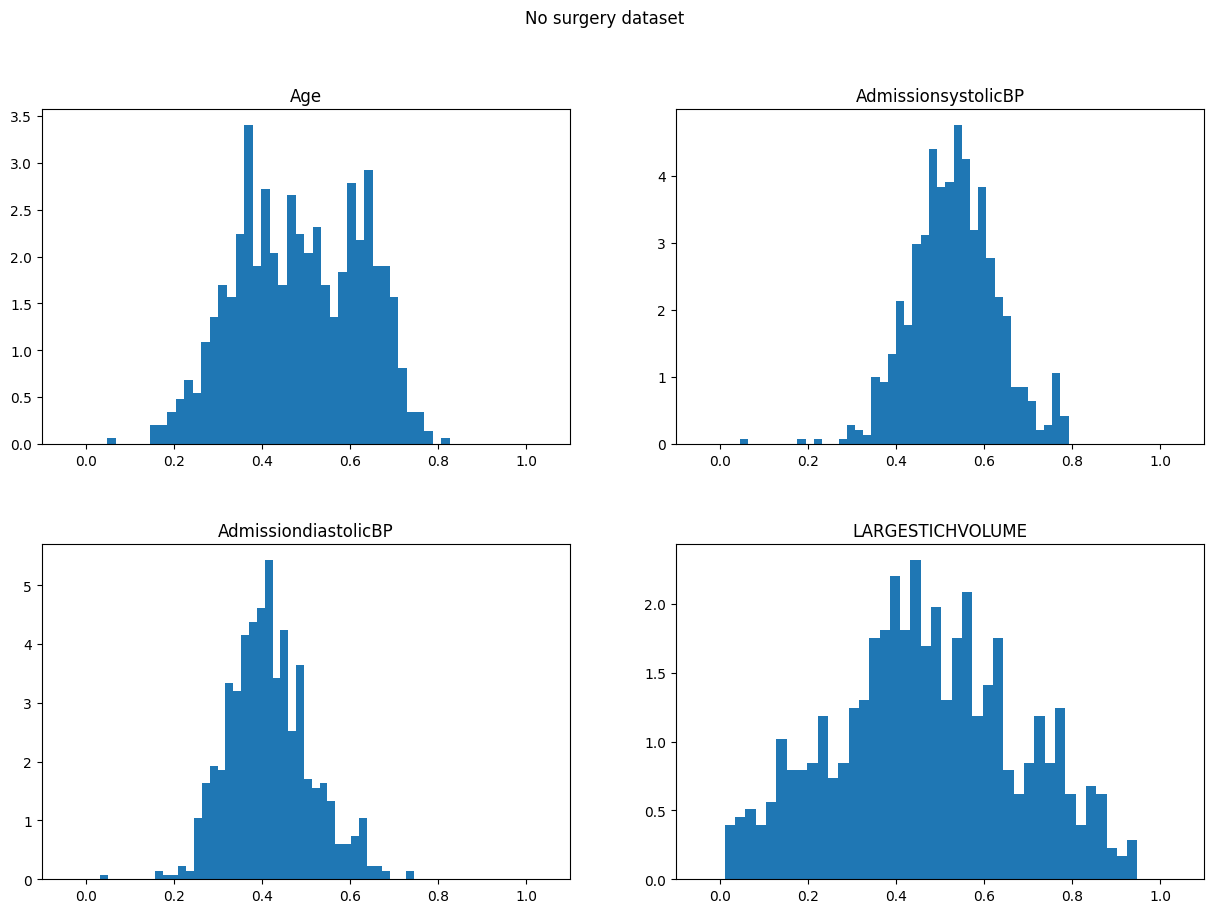

In [8]:
rows = 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

for i, ax in enumerate(axes.flatten()):
    ax.hist(df[continuous[i]], bins=40, density=True)
    ax.set_xlim(-0.1, 1.1)
    ax.set_title(continuous[i])

plt.suptitle('No surgery dataset')
plt.subplots_adjust(hspace=0.3)
plt.savefig('afternorm.png')
plt.show()

## Save normalized dataset

In [9]:
df.to_csv('normalized_nosurgery_QMH_2025Nov.csv', index=False)